In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
from keras.models import load_model

In [8]:

test_data_dir="database/testing"

In [9]:
model = load_model('face_recognition_model.h5')

In [10]:
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Adjust the target size
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

1/1 [==============================] - 0s 337ms/step
[[0.000000e+00 1.000000e+00 1.082581e-33]]


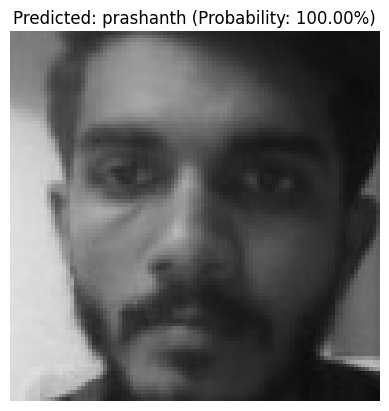

1/1 [==============================] - 0s 131ms/step
[[6.3217050e-15 9.9999869e-01 1.3601119e-06]]


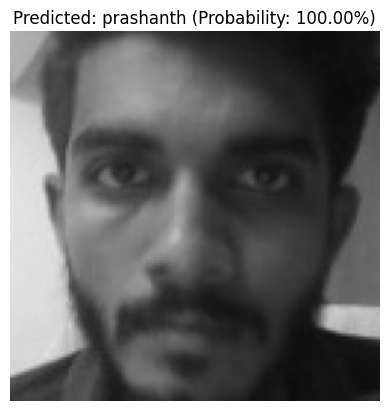

1/1 [==============================] - 0s 112ms/step
[[8.4228947e-07 9.9126124e-01 8.7378854e-03]]


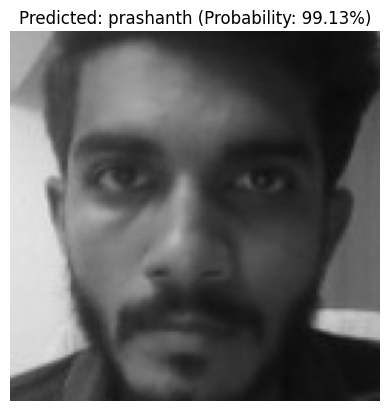

1/1 [==============================] - 0s 115ms/step
[[1.0000000e+00 0.0000000e+00 1.7586044e-25]]


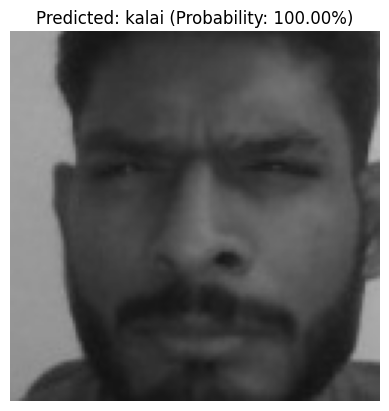

1/1 [==============================] - 0s 104ms/step
[[2.8655233e-04 2.1029446e-16 9.9971348e-01]]


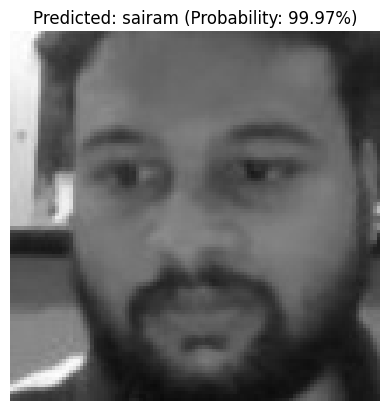

1/1 [==============================] - 0s 105ms/step
[[1.0000000e+00 0.0000000e+00 1.2195209e-33]]


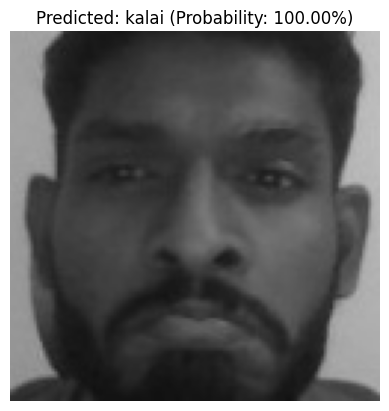

1/1 [==============================] - 0s 99ms/step
[[9.9811208e-01 1.8823451e-28 1.8878990e-03]]


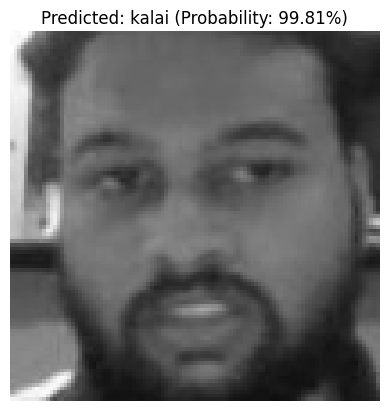

1/1 [==============================] - 0s 98ms/step
[[1.0000000e+00 0.0000000e+00 5.7341987e-31]]


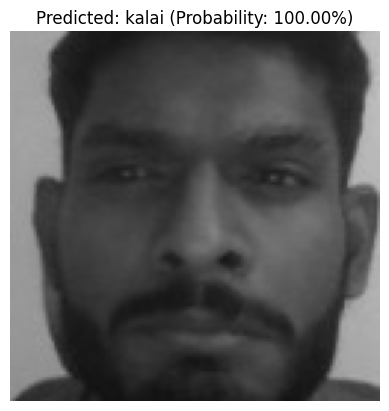

1/1 [==============================] - 0s 94ms/step
[[3.588555e-12 1.581650e-24 1.000000e+00]]


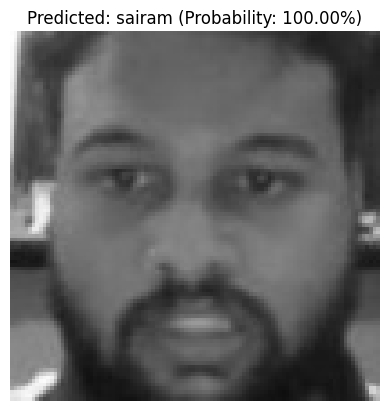

In [11]:
for image_file in os.listdir(test_data_dir):
    if image_file.endswith('.jpg'):
        image_path = os.path.join(test_data_dir, image_file)
        
        
        img = preprocess_image(image_path)
        
        
        prediction = model.predict(img)
        
       
        predicted_class_index = np.argmax(prediction)
        class_names = ['kalai','prashanth','sairam']
        predicted_class = class_names[predicted_class_index]
        
       
        probability = prediction[0][predicted_class_index]
        print(prediction)
        
        
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        
        plt.figure()
        plt.imshow(img_rgb)
        plt.title(f'Predicted: {predicted_class} (Probability: {probability * 100:.2f}%)')
        plt.axis('off')
        plt.show()

In [12]:
import pandas as pd


image_paths = []  
predicted_labels = [] 
predicted_probabilities = []  

for image_file in os.listdir(test_data_dir):
    if image_file.endswith('.jpg'):
        image_path = os.path.join(test_data_dir, image_file)
        
        img = preprocess_image(image_path)
        
        prediction = model.predict(img)
        
        predicted_class_index = np.argmax(prediction)
        class_names = ['kalai', 'prashanth', 'sairam']
        predicted_class = class_names[predicted_class_index]
        
        probability = prediction[0][predicted_class_index]
        
       
        image_paths.append(image_path)
        predicted_labels.append(predicted_class)
        predicted_probabilities.append(probability)


data = {
    'Image_Path': image_paths,
    'Predicted_Label': predicted_labels,
    'Predicted_Probability': predicted_probabilities
}

df = pd.DataFrame(data)
print(df)


1/1 [==============================] - 0s 108ms/step
                        Image_Path Predicted_Label  Predicted_Probability
0  database/testing\face_0_284.jpg       prashanth               1.000000
1  database/testing\face_0_296.jpg       prashanth               0.999999
2  database/testing\face_0_308.jpg       prashanth               0.991261
3   database/testing\face_0_36.jpg           kalai               1.000000
4   database/testing\face_0_39.jpg          sairam               0.999713
5   database/testing\face_0_48.jpg           kalai               1.000000
6   database/testing\face_0_51.jpg           kalai               0.998112
7   database/testing\face_0_60.jpg           kalai               1.000000
8   database/testing\face_0_90.jpg          sairam               1.000000
